#Dependências

In [9]:
from load_mnist import load_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import numpy as np
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

# Modelo Inicial

In [10]:
learning_rate = 0.001
epochs = 5
num_classes = 10

In [11]:
training_data, validation_data, test_data = load_data()
training_data = list(training_data)
test_data = list(test_data)

In [12]:
X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),  # Flatten the data for dense layers
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=num_classes, activation='softmax')  # Output layer with softmax for probabilities
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy'])


/home/caio-barreto/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(X_train, y_train, epochs=epochs)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8970 - loss: 0.3262
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9853 - loss: 0.0472
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9907 - loss: 0.0288
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9930 - loss: 0.0204
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9948 - loss: 0.0162


In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0413
Test Accuracy: 0.9900000095367432


In [16]:
predictions = model.predict(X_test)

predicted_labels = predictions.argmax(axis=1)

cm = confusion_matrix(y_test, predicted_labels)

for i in range(num_classes):
  accuracy = cm[i, i] / cm[i, :].sum()
  print(f"Accuracy for class {i}: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy for digit 0: 0.9929
Accuracy for digit 1: 0.9956
Accuracy for digit 2: 0.9913
Accuracy for digit 3: 0.9970
Accuracy for digit 4: 0.9919
Accuracy for digit 5: 0.9753
Accuracy for digit 6: 0.9927
Accuracy for digit 7: 0.9805
Accuracy for digit 8: 0.9877
Accuracy for digit 9: 0.9931


In [17]:
predicted_labels = predictions.argmax(axis=1)

report = classification_report(y_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



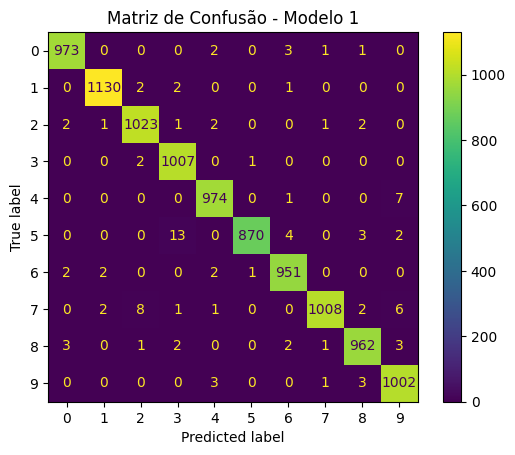

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Modelo 1')
plt.show()
